### Define những lib cần thiết

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import datasets, linear_model
%matplotlib inline

### Linear Regression với hàm một biến - Single Variable
Ở đây ta load data từ file csv, [link file csv](https://drive.google.com/file/d/1DV8psMeg8w4FJfE76jwb4D1yxDocg138/view?usp=sharing)

Ta nhận thấy, hàm hồi quy sẽ có dạng như sau: 
 + x, y đã biết
 + w là model parameter cần tối ưu
 
Việc cần làm là minimize cost function 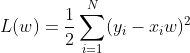
Rõ ràng để minimize cost function thì ta cần tìm optimal parameter **w**. Có hai cách chính để tìm opimal point **w** đó là
 + Gradient Descent
 + Giải normal equation
 
Bên dưới đây mình sẽ trình bày cách giải sử dụng normal equation, sau khi tính toán đạo hàm của loss function trên, ta sẽ được một normal equation như sau 
Ta sẽ sử dụng công thức trên để đi tìm **w**. Ngoài ra nếu muốn tham khảo thêm cách giải bằng Gradient Descent, mn có thể qua folder Gradient Descent để xem

Solution found by normal equation: w = [[9.90860619 1.28735737]]


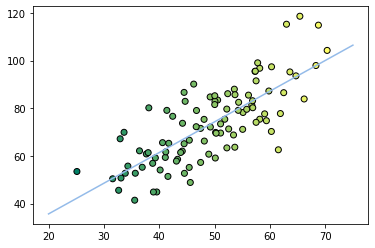

In [2]:
# Load data từ file csv
df = pd.read_csv('duong dan den file csv da down ve may')
weight_data = np.array([df.iloc[:, 0]]).T
height_data = np.array([df.iloc[:, 1]]).T

# Xây dựng công thức Linear Regression
X_bar = np.concatenate((np.ones((weight_data.shape[0], 1)), weight_data), axis = 1)
A = np.dot(X_bar.T, X_bar) 
b = np.dot(X_bar.T, height_data)
w_optimal = np.dot(np.linalg.pinv(A), b) # hàm np.linalg.pinv là giả nghịch đảo 

# visual lize data
plt.scatter(weight_data, height_data, c=weight_data, cmap='summer', edgecolors='black')

# Draw fitting line
x_1 = np.linspace(20, 75, 3, endpoint = True)
y = w_optimal[0, 0] + w_optimal[1, 0]*x_1 
plt.plot(x_1, y, color='#94bbe9')

print(f'Solution found by normal equation: w = {w_optimal.T}')

# Dự đoán chiều cao theo cân nặng nhập vào
# weight = int(input('Nhap weight: '))
# w_0 = w_opimal[0, 0]
# w_1 = w_opimal[1, 0]
# height = w_0 + w_1*weight
# print(f'Vay chieu cao tuong ung voi {weight} la: {height}')

### Tiến hành so sánh khi sử dụng thư viện sklearn

In [3]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(X_bar, height_data)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )

Solution found by scikit-learn  :  [[9.90860619 1.28735737]]


Vậy là đã xong phần xây dựng model cho bài toán Linear Regression sử dụng Normal Equation. Bạn hoàn toàn có thể tham khảo cách giải bằng Gradient Descent, mình có đặt ở folder Gradient Descent - Multiple Variables